Одна з найбільш поширених **проблем**, що зустрічаються в computer science - це проблема сортування якогось набору даних.

Сортування - одна з найкраще вивчених областей CS і це має ефект в тому числі на те, що вам майже ніколи не доведеться реалізовувати свої алгоритми сортування. Але важливо розуміти деякі властивості цього класу алгоритмів, щоб навіть з готових імплементацій обрати правильну.

Також, алгоритми сортування іноді є прекрасним ілюстративним прикладом для **дизайну алгоритмів**.

In [161]:
SIZE = 1000

In [162]:
original_lst = list(range(SIZE))

In [163]:
import random

Перший алгоритм сортування, що ми розглянемо, називається selection sort.
Він влаштований дуже просто: два вкладених цикли порівнюють елементи між собою. 
В кінці другого цикла найменший елемент та елемент з першого цикла міняють місцям.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n**2)
* Середній випадок: O(n**2)

[Народний танок в якості ілюстрації](https://youtu.be/0-W8OEwLebQ?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [164]:
def selection_sort(arr):
    size = len(arr)
    for i in range(size):
        min = i
        for j in range(i, size):
            if arr[j] < arr[min]:
                min = j
        arr[i], arr[min] = arr[min], arr[i]

In [165]:
random.shuffle(original_lst)
print(original_lst)
selection_sort(original_lst)
print(original_lst)

[581, 662, 815, 697, 58, 12, 570, 93, 141, 528, 669, 914, 361, 499, 433, 938, 280, 269, 364, 243, 824, 554, 366, 352, 6, 731, 900, 656, 752, 252, 255, 912, 968, 571, 925, 859, 527, 41, 60, 647, 227, 856, 382, 10, 394, 215, 63, 331, 603, 902, 436, 777, 772, 265, 803, 306, 923, 189, 557, 885, 271, 161, 278, 505, 646, 113, 708, 180, 168, 738, 421, 42, 118, 407, 78, 297, 199, 51, 976, 733, 880, 445, 68, 365, 792, 135, 458, 645, 460, 66, 840, 595, 869, 357, 346, 289, 593, 379, 427, 229, 73, 11, 573, 399, 540, 325, 514, 451, 728, 206, 305, 317, 930, 897, 890, 776, 704, 780, 703, 108, 226, 55, 826, 155, 511, 152, 82, 596, 610, 262, 29, 802, 768, 174, 422, 286, 435, 90, 287, 658, 745, 330, 678, 808, 264, 437, 887, 829, 291, 990, 791, 140, 817, 951, 342, 103, 748, 927, 773, 868, 314, 987, 561, 945, 80, 221, 523, 144, 903, 568, 572, 530, 147, 218, 231, 386, 551, 904, 470, 558, 600, 969, 446, 952, 405, 86, 166, 120, 515, 20, 223, 442, 926, 691, 426, 17, 502, 119, 992, 312, 770, 553, 272, 674, 235

In [166]:
%%timeit

random.shuffle(original_lst)
selection_sort(original_lst)

22.8 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [167]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable


def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list,
                      preparation: Callable = lambda arr: arr) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = preparation(type_constr(range(range_bound)))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr,)
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

In [168]:
def shuffle_pure_func(arr):
    random.shuffle(arr)
    return arr

def reverse_arr(arr):
    return arr[::-1]

In [169]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 100

range_bounds = list(range(10, RANGE_BOUND_MAX))

selection_times: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
selection_times_reverse: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list, reverse_arr)
selection_times_already_sorted: List[float] = time_algs_by_mean(selection_sort, TESTS_NUM, range_bounds, list)

In [170]:
import matplotlib.pyplot as plt

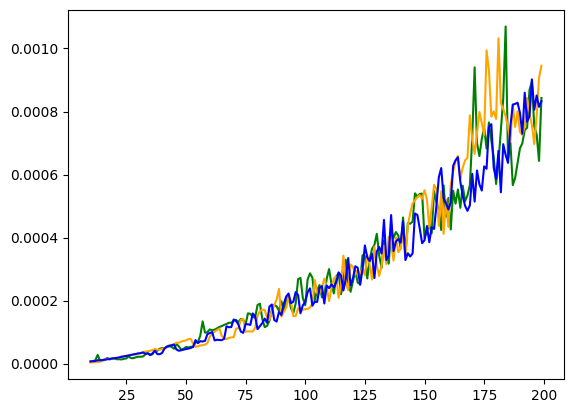

In [171]:
plt.plot(range_bounds, selection_times, color = "green")
plt.plot(range_bounds, selection_times_reverse, color = "orange")
plt.plot(range_bounds, selection_times_already_sorted, color = "blue")

Наступний алгоритм - insertion sort. За принципом роботи він схожий на перемішування карт у руці.

Асимптотична складність:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n)
* Середній випадок: O(n**2)

[Народний танок для ілюстрації алгоритму](https://youtu.be/EdIKIf9mHk0?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

In [172]:
def insertion_sort(arr):
    size = len(arr)
    for i in range(1, size):
        j = i - 1
        key = arr[i]
        while arr[j] > key and j >= 0:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

In [173]:
random.shuffle(original_lst)
print(original_lst)
insertion_sort(original_lst)
print(original_lst)

[638, 994, 757, 491, 889, 342, 74, 123, 246, 752, 71, 477, 8, 694, 374, 679, 473, 854, 129, 573, 900, 796, 749, 43, 295, 340, 643, 425, 507, 856, 941, 666, 308, 321, 407, 257, 65, 756, 442, 813, 201, 150, 910, 156, 58, 370, 419, 146, 701, 715, 922, 82, 337, 99, 182, 16, 75, 404, 869, 642, 561, 2, 703, 289, 208, 108, 6, 325, 780, 541, 418, 353, 982, 680, 639, 944, 993, 155, 51, 115, 532, 103, 1, 488, 783, 972, 702, 691, 848, 855, 620, 805, 200, 421, 304, 653, 483, 660, 220, 25, 968, 883, 100, 445, 32, 175, 376, 629, 379, 533, 320, 901, 825, 166, 837, 682, 705, 815, 136, 925, 697, 197, 974, 402, 267, 263, 56, 487, 346, 429, 870, 992, 651, 460, 157, 465, 625, 593, 683, 185, 396, 369, 301, 214, 677, 631, 572, 345, 874, 928, 621, 626, 242, 90, 476, 812, 113, 739, 658, 965, 397, 496, 887, 453, 929, 432, 26, 471, 884, 714, 250, 871, 853, 198, 522, 338, 919, 589, 318, 905, 59, 160, 478, 98, 977, 846, 314, 49, 77, 916, 753, 763, 574, 431, 245, 139, 549, 877, 212, 47, 907, 738, 73, 158, 674, 367

In [174]:
%%timeit

random.shuffle(original_lst)
insertion_sort(original_lst)

23.1 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [175]:
RANGE_BOUND_MAX = 200
TESTS_NUM = 1000

range_bounds = list(range(10, RANGE_BOUND_MAX))

In [176]:
insertion_times: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)
insertion_times_reverse: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)
insertion_times_already_sorted: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

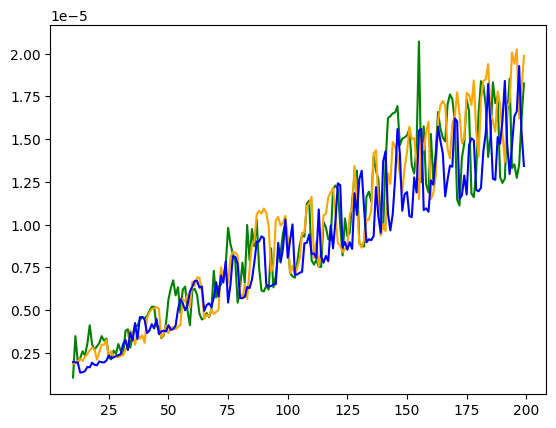

In [177]:
plt.plot(range_bounds, insertion_times, color = "green")
plt.plot(range_bounds, insertion_times_reverse, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted, color = "blue")

In [178]:
RANGE_BOUND_START = 10
RANGE_BOUND_MAX = 1000
TESTS_NUM = 50

range_bounds = list(range(RANGE_BOUND_START, RANGE_BOUND_MAX))

In [179]:
insertion_times_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [180]:
insertion_times_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [181]:
insertion_times_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

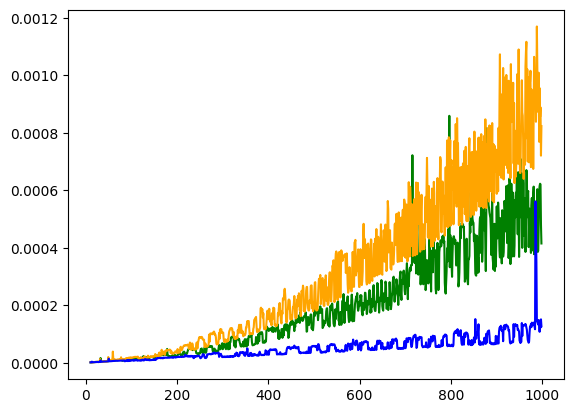

In [182]:
plt.plot(range_bounds, insertion_times_big_arr, color = "green")
plt.plot(range_bounds, insertion_times_reverse_big_arr, color = "orange")
plt.plot(range_bounds, insertion_times_already_sorted_big_arr, color = "blue")

Сортування вставками має декілька важливих властивостей:

* Це in-place алгоритм (споживає тільки О(1) пам'яті). Це ж поширюється і на selection sort.
* Це стабільний алгоритм (якщо ви відсортуєте список об'єктів спочатку за одним полем, а потім за іншим, порядок, встановлений за першим полем, буде збережено)
* Це онлайн-алгоритм (він здатен сортувати без отримання всього набору елементів за раз)
* Цей алгоритм працює за **лінійний час** на так званих частково відсортованих послідовностях (вона є такою, якщо елемент знаходиться не більше ніж у k позиціях від істиної). Повна оцінка тоді буде O(k*n)

Сортування вставками іноді використовується як додаткова частина гібридних алгоритмів сортування (наприклад у стандартному алгоритмі сортування Python під назвою Timsort)

Існує узагальнення сортування вставками, що дозволяє порівнювати нам елементи на відстані більше ніж 1. Воно носить назву сортування Шелла.

Асимптотична складність:

* Найгірший випадок - O(n**2)
* Найкращий випадок - O(n*log(n))
* Середній випадок - **невідомий**

[Народний танок для ілюстрації алгоритму](https://youtu.be/yn0EgXHb5jc?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

Власне, сам принцип сортування Шелла базується на порівнянні елементів, що рівновіддалені на деяке число k по індексу. Після проходження до кінця масиву, цей k зменшується певним чином, щоб, в кінці кінців, сталося порівняння кожного елементу з наступним. Відомо, що асимптотична складність сортування Шелла дуже сильно залежить саме від виду цих послідовностей. Для імплементації нижче використана так звана послідовність Кнута.

In [183]:
from typing import List, TypeVar

T = TypeVar("T")


def shell_sort(array_to_sort: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable array_to_sort and treats it as mutable"""
    array_length: int = len(array_to_sort)
    shell_sort_step: int = 1
    # Recursively founding the closest member of Knuths sequence
    while shell_sort_step <= array_length // 3:
        shell_sort_step = 3 * shell_sort_step + 1
    while shell_sort_step > 0:
        # First loop maintains the Shellsort step ascending sequence
        for pointer in range(shell_sort_step, array_length, 1):
            # Second loop maintains the pointer for each h-sorting iterations
            # It's important to maintain the item_to_compare variable as it
            # stores our value for compare with other memmbers of h-sequence
            item_to_compare: T = array_to_sort[pointer]
            for decremented_pointer in range(pointer, 0, -shell_sort_step):
                # Third loop maintains insertion sort with the step value h.
                # It will iterate through the whole array with step h.
                preceeding_item: T = array_to_sort[
                    decremented_pointer - shell_sort_step
                ]
                item: T = array_to_sort[decremented_pointer]
                if preceeding_item > item:
                    # We are doing the swap in the following technique because we need to swap within array
                    array_to_sort[decremented_pointer] = preceeding_item
                    array_to_sort[decremented_pointer - shell_sort_step] = item
                if preceeding_item < item_to_compare:
                    # When we found the item which less than item we compare, we stop the swap process
                    array_to_sort[decremented_pointer] = item_to_compare
                    break
        shell_sort_step = shell_sort_step // 3

In [184]:
random.shuffle(original_lst)
print(original_lst)
shell_sort(original_lst)
print(original_lst)

[998, 690, 775, 556, 19, 731, 113, 709, 171, 141, 657, 148, 495, 729, 832, 150, 322, 309, 411, 623, 258, 304, 191, 840, 417, 916, 528, 806, 51, 664, 392, 323, 36, 188, 537, 924, 858, 756, 358, 743, 546, 472, 53, 500, 931, 313, 910, 393, 203, 844, 138, 264, 846, 242, 866, 622, 995, 483, 77, 256, 476, 724, 466, 744, 478, 685, 23, 142, 335, 424, 750, 238, 585, 654, 156, 377, 122, 586, 167, 177, 456, 119, 103, 110, 399, 409, 510, 965, 429, 144, 983, 130, 989, 683, 210, 997, 507, 836, 306, 981, 379, 380, 969, 999, 73, 402, 687, 446, 717, 777, 803, 260, 9, 878, 875, 39, 283, 882, 426, 770, 591, 26, 131, 351, 728, 71, 235, 14, 279, 865, 93, 863, 308, 902, 293, 64, 66, 438, 202, 564, 133, 488, 584, 535, 911, 320, 614, 231, 505, 418, 403, 234, 114, 384, 68, 316, 536, 794, 630, 35, 693, 267, 54, 334, 134, 370, 603, 422, 575, 415, 739, 793, 209, 289, 42, 157, 905, 444, 432, 182, 531, 909, 265, 59, 889, 207, 529, 1, 786, 408, 652, 442, 10, 86, 198, 801, 547, 988, 883, 837, 46, 543, 974, 946, 699, 

In [185]:
%%timeit

random.shuffle(original_lst)
shell_sort(original_lst)

6.48 ms ± 389 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [186]:
shell_sort_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)


In [187]:
shell_sort_reverse_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [188]:
shell_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(insertion_sort, TESTS_NUM, range_bounds, list)

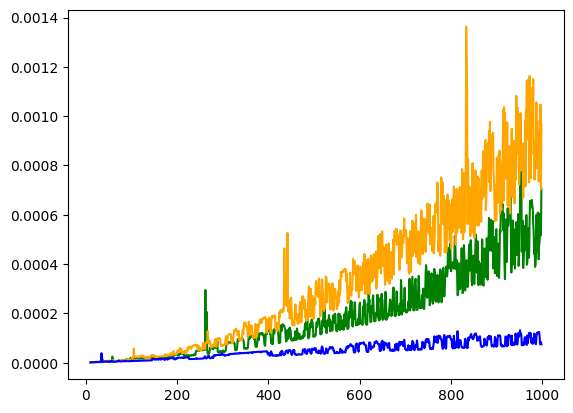

In [189]:
plt.plot(range_bounds, shell_sort_big_arr, color = "green")
plt.plot(range_bounds, shell_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, shell_sort_already_sorted_big_arr, color = "blue")

Сортування Шелла:
* Адаптивне (працює швидше якщо вхідні дані частково відсортовані, див. сортування вставкою)
* Нестабільне

Наступний алгоритм - merge sort. 

Асимптотична оцінка:

* Найгірший випадок: O(n*log(n))
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

[Народний танок](https://youtu.be/dENca26N6V4?list=PLOmdoKois7_FK-ySGwHBkltzB11snW7KQ)

З точки зору дизайну алгоритмів, сортування злиттям є еталонним прикладом техніки divide-and-conquer. Алгоритми цього типу складаються з трьох частин:

* Divide - розбити проблему на підчастини
* Conquer - вирішити проблему для кожної частини окремо
* Combine - зібрати загальне рішення з результатів попереднього етапу

In [190]:
from typing import List, TypeVar

T = TypeVar("T")


def merge_sort(arr: List[T]) -> None:
    """From the signature we know that our method does not return anything.
    Basically it performs the side effect: it sorts the variable arr and treats it as mutable"""
    if len(arr) > 1:
        mid_index: int = len(arr) // 2
        #DIVIDE
        left_subarray: List[T] = arr[:mid_index]
        right_subarray: List[T] = arr[mid_index:]
        #CONQUER
        merge_sort(left_subarray)
        merge_sort(right_subarray)
        #COMBINE
        merge(arr, left_subarray, right_subarray)


def merge(
    arr: List[T], left_subarray: List[T], right_subarray: List[T]
) -> None:
    # Two iterators for traversing the two halves
    left_pointer: int = 0
    right_pointer: int = 0

    # Iterator for the main list
    original_array_pointer: int = 0

    while left_pointer < len(left_subarray) and right_pointer < len(right_subarray):
        if left_subarray[left_pointer] <= right_subarray[right_pointer]:
            # The value from the left half has been used
            arr[original_array_pointer] = left_subarray[left_pointer]
            # Move the iterator forward
            left_pointer += 1
        else:
            arr[original_array_pointer] = right_subarray[right_pointer]
            # The value from right half has been used
            right_pointer += 1
        # Move to the next slot in main array
        original_array_pointer += 1

    # For all the remaining values in either left or right array
    # we perform merge as we know that they are greater than already merged values
    while left_pointer < len(left_subarray):
        arr[original_array_pointer] = left_subarray[left_pointer]
        left_pointer += 1
        original_array_pointer += 1

    while right_pointer < len(right_subarray):
        arr[original_array_pointer] = right_subarray[right_pointer]
        right_pointer += 1
        original_array_pointer += 1

In [191]:
random.shuffle(original_lst)
print(original_lst)
merge_sort(original_lst)
print(original_lst)

[769, 770, 154, 102, 368, 724, 281, 775, 415, 730, 545, 742, 521, 328, 967, 526, 101, 916, 976, 848, 158, 963, 73, 716, 749, 911, 411, 714, 464, 994, 595, 41, 766, 345, 2, 853, 741, 964, 859, 586, 378, 740, 492, 631, 663, 888, 592, 743, 432, 257, 612, 779, 630, 655, 688, 537, 907, 109, 185, 172, 777, 199, 311, 713, 761, 792, 127, 632, 559, 527, 550, 297, 791, 975, 253, 959, 603, 293, 910, 808, 383, 304, 129, 20, 509, 212, 122, 672, 637, 283, 124, 648, 686, 229, 403, 762, 294, 774, 357, 51, 330, 324, 111, 554, 908, 973, 390, 238, 84, 97, 638, 1, 21, 361, 984, 516, 840, 103, 665, 837, 702, 353, 31, 587, 68, 242, 44, 931, 455, 536, 831, 391, 139, 764, 216, 565, 694, 410, 174, 331, 624, 289, 661, 525, 784, 498, 682, 263, 873, 821, 285, 271, 249, 261, 436, 45, 376, 382, 343, 579, 449, 422, 213, 983, 18, 614, 801, 192, 581, 313, 392, 446, 379, 425, 337, 793, 783, 944, 470, 746, 955, 668, 308, 969, 360, 59, 433, 421, 160, 856, 251, 689, 924, 106, 156, 903, 650, 570, 247, 613, 573, 225, 429, 6

In [192]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

2.64 ms ± 521 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [193]:
merge_sort_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, shuffle_pure_func)

KeyboardInterrupt: 

In [ ]:
merge_sort_reverse_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list, reverse_arr)

In [ ]:
merge_sort_already_sorted_big_arr: List[float] = time_algs_by_mean(merge_sort, TESTS_NUM, range_bounds, list)

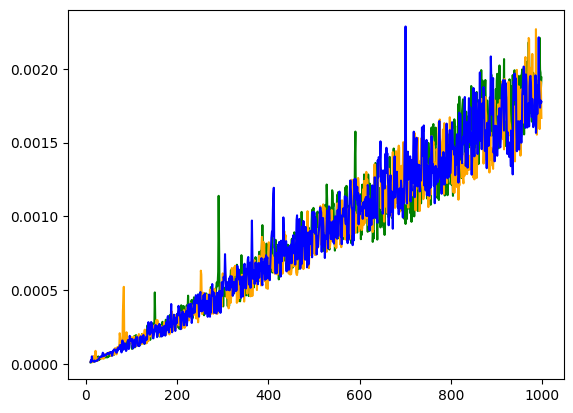

In [ ]:
plt.plot(range_bounds, merge_sort_big_arr, color = "green")
plt.plot(range_bounds, merge_sort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, merge_sort_already_sorted_big_arr, color = "blue")

Властивості merge sort:

* Стабільність
* НЕ-inplace (O(n) додаткової спожитої пам'яті). In-place імплементації **теоретично** можливі, але вважаються занадто складними для реалізації

Існує теорема з доволі простим доведенням про верхню межу **кількості порівнянь** для будь якого comparison-based алгоритму сортування.
Ця верхня межа дорівнює **O(n*log(n))** (насправді, там використовується нотація Big Omega).

Це слідує з кількості можливих перестановок в масиві і побудованому дереві прийняття рішень (можемо розібрати, якщо цікаво).

Всі розглянуті в цьому уроці алгоритми сортування є comparison-based. 

З цієї теореми є наслідок: merge sort і heap sort (поза нашим розглядом) є **асимптотично оптимальними** порівняльними алгоритмами сортування, тому що їхній перфоманс **у найгіршому випадку** описується як О(n*log(n)).

Але це не значить, що merge sort або heapsort є **найшвидшими** алгоритмом у **середньому** та **найкращому** випадках. У найкращому випадку їх може "обігнати" insertion sort.

У середньому випадку існує як мінімум один comparison-based алгоритм, котрий фактично є швидшим від усі інші відомі порівняльні алгоритми. Він носить назву **quicksort**.

In [ ]:
from random import randint

T = TypeVar("T")


def shuffle(array: List[T]) -> None:
    """Simple implementation for Fisher-Yates shuffle algo.
    
    You can use random.shuffle() instead"""
    array_length: int = len(array)
    for index in range(array_length - 1, 0, -1):
        random_index: int = randint(0, index)
        array[index], array[random_index] = array[random_index], array[index]


def partition(array, begin, end):
    pivot = begin
    for i in range(begin + 1, end + 1):
        if array[i] <= array[begin]:
            pivot += 1
            array[i], array[pivot] = array[pivot], array[i]
    array[pivot], array[begin] = array[begin], array[pivot]
    return pivot


def quicksort(array, begin=0, end=None):
    shuffle(array)
    if end is None:
        end = len(array) - 1

    def _quicksort(array, begin, end):
        if begin >= end:
            return
        pivot = partition(array, begin, end)
        _quicksort(array, begin, pivot - 1)
        _quicksort(array, pivot + 1, end)

    return _quicksort(array, begin, end)

Асимптотична оцінка:

* Найгірший випадок: O(n**2)
* Найкращий випадок: O(n*log(n))
* Середній випадок: O(n*log(n))

* Додаткова пам'ять: O(log(n))

[Народний танок](https://www.youtube.com/watch?v=3San3uKKHgg)

In [ ]:
random.shuffle(original_lst)
print(original_lst)
quicksort(original_lst)
print(original_lst)

[87, 616, 739, 224, 341, 853, 369, 933, 86, 479, 477, 854, 744, 368, 268, 270, 682, 849, 671, 444, 659, 943, 925, 186, 415, 195, 439, 69, 498, 238, 959, 363, 162, 194, 731, 464, 175, 321, 984, 884, 790, 644, 820, 688, 418, 1, 9, 455, 735, 810, 424, 579, 58, 818, 629, 389, 916, 434, 770, 696, 160, 66, 956, 116, 459, 761, 533, 338, 305, 747, 98, 897, 413, 145, 879, 308, 599, 5, 419, 391, 515, 808, 361, 565, 801, 895, 955, 516, 663, 745, 482, 446, 621, 885, 749, 624, 31, 97, 948, 590, 800, 689, 310, 333, 339, 81, 936, 236, 697, 772, 589, 704, 721, 607, 893, 950, 253, 233, 231, 506, 570, 435, 496, 54, 703, 96, 372, 120, 863, 804, 875, 457, 665, 456, 547, 736, 614, 613, 793, 561, 374, 836, 37, 101, 124, 581, 139, 345, 307, 519, 291, 615, 47, 878, 971, 927, 648, 221, 353, 410, 122, 535, 690, 545, 214, 319, 154, 501, 899, 701, 25, 981, 274, 60, 312, 207, 503, 282, 609, 296, 643, 870, 330, 763, 666, 813, 219, 354, 364, 10, 271, 280, 961, 172, 306, 672, 754, 658, 379, 111, 438, 65, 454, 403, 46

In [ ]:
%%timeit

random.shuffle(original_lst)
merge_sort(original_lst)

3.08 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
def quicksort_wo_shuffle(arr, begin=0, end=None):
    if end is None:
        end = len(arr) - 1

    def _quicksort(arr, begin, end):
        if begin >= end:
            return
        pivot = partition(arr, begin, end)
        _quicksort(arr, begin, pivot - 1)
        _quicksort(arr, pivot + 1, end)

    return _quicksort(arr, begin, end)

In [ ]:
quicksort_big_arr: List[float] = time_algs_by_mean(quicksort_wo_shuffle, TESTS_NUM, range_bounds, list, shuffle_pure_func)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/illia/teaching/python_course_tasks/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_80953/2095992118.py", line 1, in <module>
    quicksort_big_arr: List[float] = time_algs_by_mean(quicksort_wo_shuffle, TESTS_NUM, range_bounds, list, shuffle_pure_func)
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_80953/3258208098.py", line 21, in time_algs_by_mean
    times_for_n: List[float] = [function_timer(
                               ^^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_80953/3258208098.py", line 21, in <listcomp>
    times_for_n: List[float] = [function_timer(
                                ^^^^^^^^^^^^^^^
  File "/tmp/ipykernel_80953/3258208098.py", line 10, in function_timer
    function()
  File "/tmp/ipykernel_80953

In [ ]:
quicksort_reverse_big_arr: List[float] = time_algs_by_mean(quicksort_wo_shuffle, TESTS_NUM, range_bounds, list, reverse_arr)

In [ ]:
quicksort_already_sorted_big_arr: List[float] = time_algs_by_mean(quicksort_wo_shuffle, TESTS_NUM, range_bounds, list)

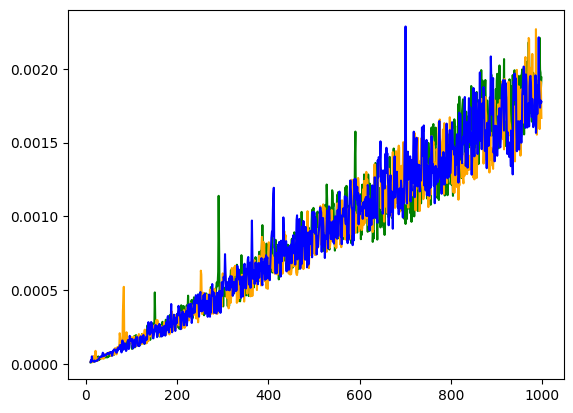

In [ ]:
plt.plot(range_bounds, quicksort_big_arr, color = "green")
plt.plot(range_bounds, quicksort_reverse_big_arr, color = "orange")
plt.plot(range_bounds, quicksort_already_sorted_big_arr, color = "blue")

Властивості:

* НЕ стабільний (але існують стабільні модифікації)
* In-place (сортує масив всередині нього, хоча й використовує до O(log(n)) додаткової пам'яті)
* Divide-and-conquer
* З урахуванням усіх констант є найшвидшим з comparison-based алгоритмів в **середньому** випадку **на нескінченності**